berlin52_NNHonly

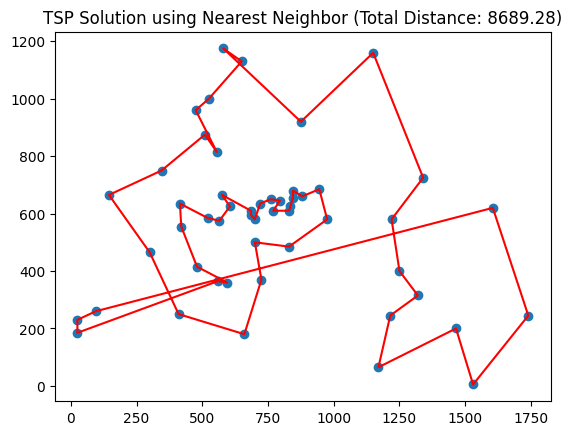

Time taken to render: 0.28131747245788574 seconds




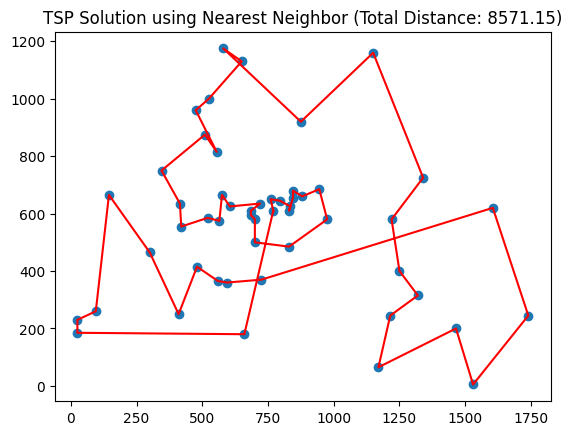

Time taken to render: 0.30106401443481445 seconds




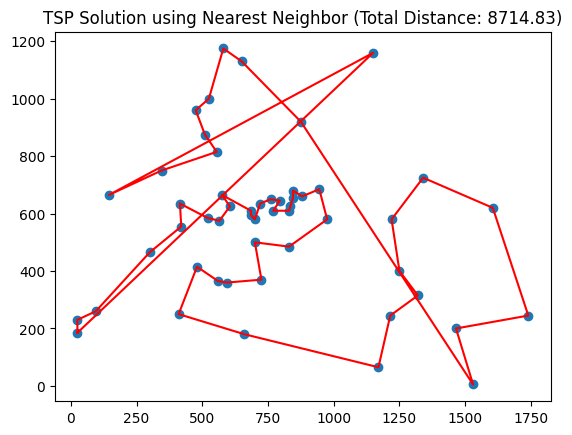

Time taken to render: 0.28745269775390625 seconds




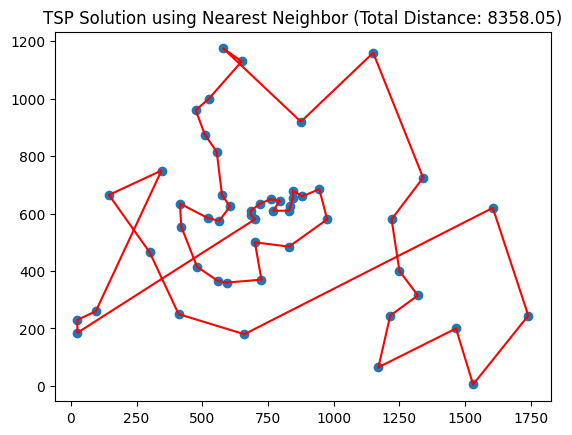

Time taken to render: 0.2895188331604004 seconds




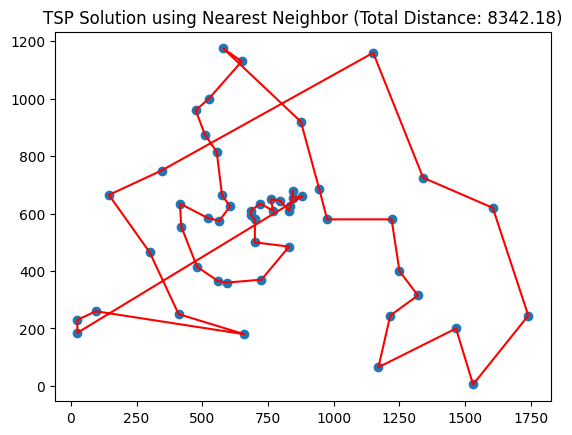

Time taken to render: 0.42377591133117676 seconds




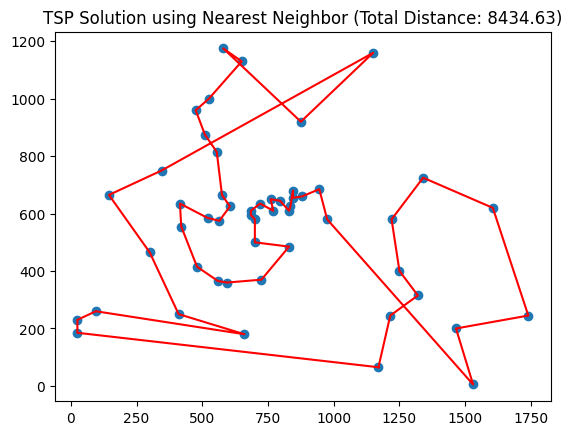

Time taken to render: 0.2757883071899414 seconds




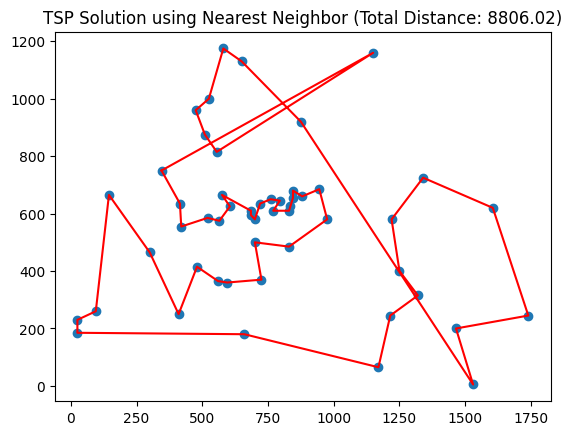

Time taken to render: 0.2850627899169922 seconds




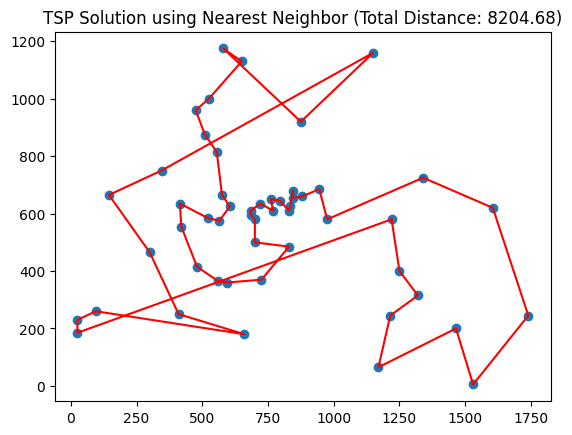

Time taken to render: 0.2564270496368408 seconds




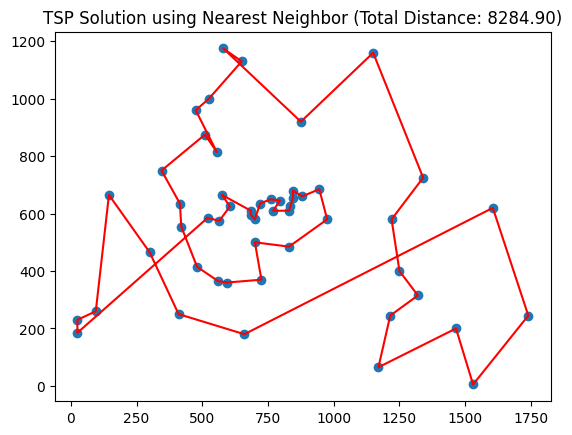

Time taken to render: 0.27437758445739746 seconds




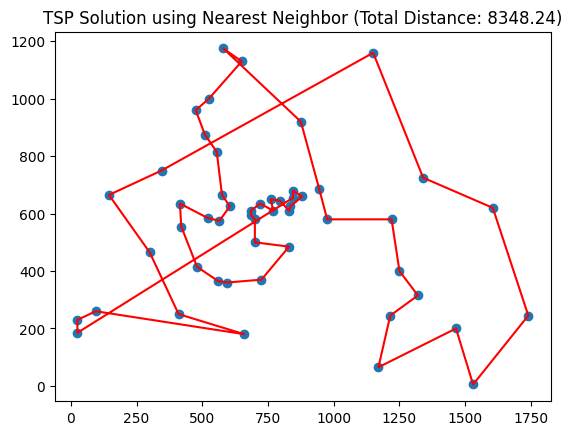

Time taken to render: 0.3918001651763916 seconds


Average Tour Length: 8475.39507208738
Average Time taken to render: 0.3066584825515747 seconds


In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')  # Updated regular expression

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates


# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "berlin52.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(10):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()
    
    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


berlin52_NNHwith2OPT

Iteration 677: Improved total distance to 8327.53
Iteration 711: Improved total distance to 8264.06
Iteration 917: Improved total distance to 8187.88
Iteration 924: Improved total distance to 8159.17
Iteration 1848: Improved total distance to 8061.06
Iteration 1960: Improved total distance to 8019.06
Iteration 2173: Improved total distance to 7999.55
Iteration 2174: Improved total distance to 7812.17
Iteration 3230: Improved total distance to 7774.58


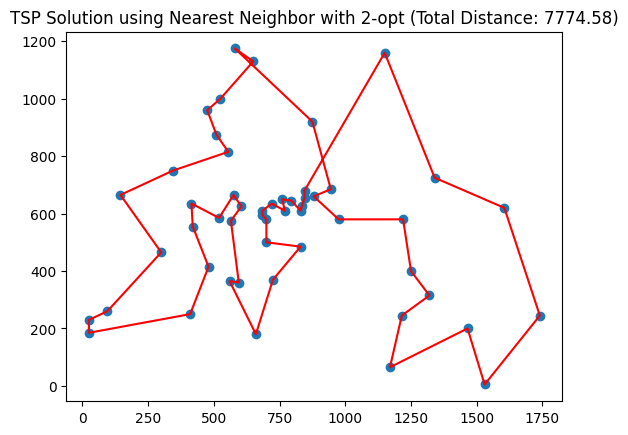

Time taken to render: 2.7766857147216797 seconds


Iteration 5: Improved total distance to 8159.59
Iteration 1041: Improved total distance to 8119.95
Iteration 1062: Improved total distance to 8056.48
Iteration 1177: Improved total distance to 7980.30
Iteration 1184: Improved total distance to 7951.58
Iteration 2251: Improved total distance to 7853.47
Iteration 2324: Improved total distance to 7811.48
Iteration 2446: Improved total distance to 7791.97
Iteration 2447: Improved total distance to 7604.58
Iteration 3594: Improved total distance to 7566.99


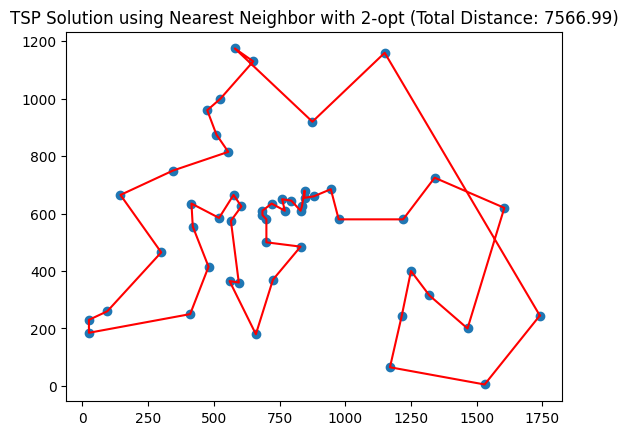

Time taken to render: 2.853289842605591 seconds


Iteration 8: Improved total distance to 8056.93
Iteration 1041: Improved total distance to 8017.28
Iteration 1062: Improved total distance to 7953.81
Iteration 1177: Improved total distance to 7877.63
Iteration 1184: Improved total distance to 7848.92
Iteration 2251: Improved total distance to 7750.81
Iteration 2324: Improved total distance to 7708.81
Iteration 2446: Improved total distance to 7689.31
Iteration 2447: Improved total distance to 7501.92
Iteration 3594: Improved total distance to 7464.33


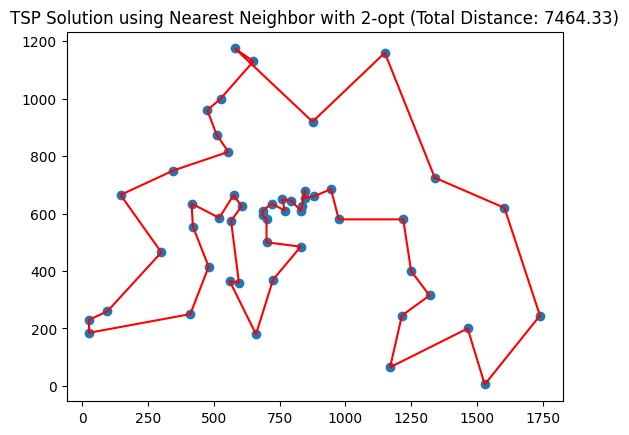

Time taken to render: 3.115809440612793 seconds


Iteration 35: Improved total distance to 8944.69
Iteration 36: Improved total distance to 8904.61
Iteration 47: Improved total distance to 8503.87
Iteration 593: Improved total distance to 8359.70
Iteration 606: Improved total distance to 8198.18
Iteration 972: Improved total distance to 8161.39
Iteration 996: Improved total distance to 8125.20
Iteration 1018: Improved total distance to 8048.13
Iteration 1019: Improved total distance to 7875.89
Iteration 1041: Improved total distance to 7866.19
Iteration 1082: Improved total distance to 7826.55
Iteration 1101: Improved total distance to 7763.08
Iteration 1223: Improved total distance to 7740.55
Iteration 2298: Improved total distance to 7642.43
Iteration 2496: Improved total distance to 7635.51


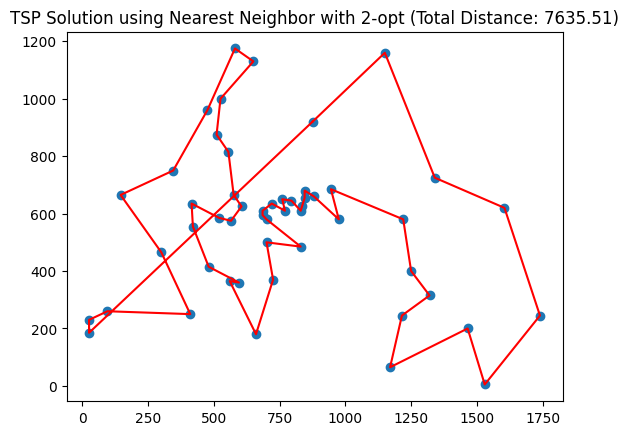

Time taken to render: 2.124290704727173 seconds


Iteration 806: Improved total distance to 8166.54
Iteration 1227: Improved total distance to 8128.71
Iteration 1230: Improved total distance to 8062.01
Iteration 1271: Improved total distance to 8049.44
Iteration 1272: Improved total distance to 7974.64
Iteration 2060: Improved total distance to 7876.63
Iteration 2084: Improved total distance to 7721.31
Iteration 2275: Improved total distance to 7694.05
Iteration 2528: Improved total distance to 7489.46


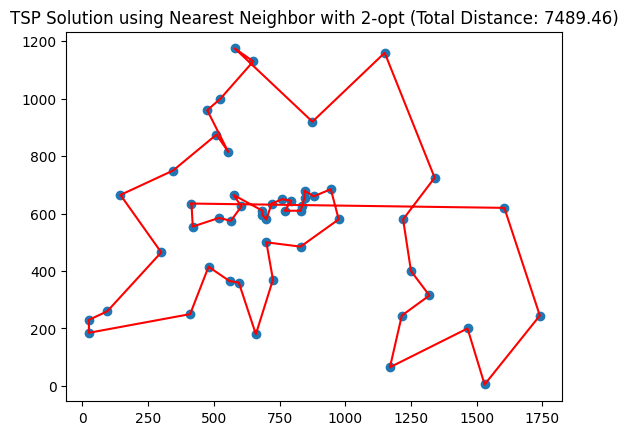

Time taken to render: 1.9840505123138428 seconds


Average Tour Length: 7586.175516892106
Average Time taken to render: 2.5708252429962157 seconds


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')  # Updated regular expression

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "berlin52.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(5):
    start_time = time.time()  # Start timing for this run

    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 2-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


berlin52_NNHwith3OPT

Iteration 134: Improved total distance to 7778.78
Iteration 16281: Improved total distance to 7762.62
Iteration 16762: Improved total distance to 7670.30
Iteration 39089: Improved total distance to 7646.40


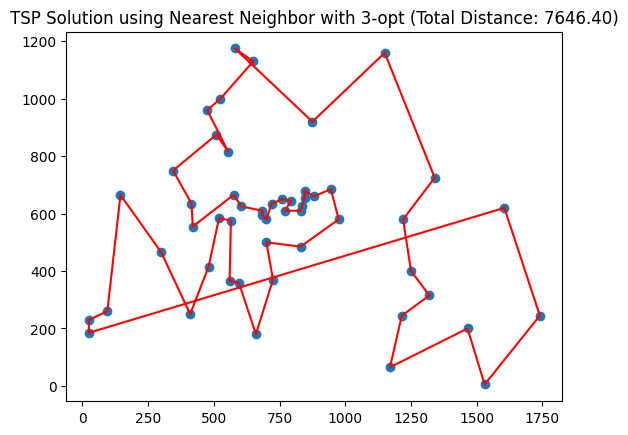

Time taken to render: 2.7897775173187256 seconds


Iteration 10263: Improved total distance to 8282.27
Iteration 16342: Improved total distance to 8195.49
Iteration 17860: Improved total distance to 8044.25


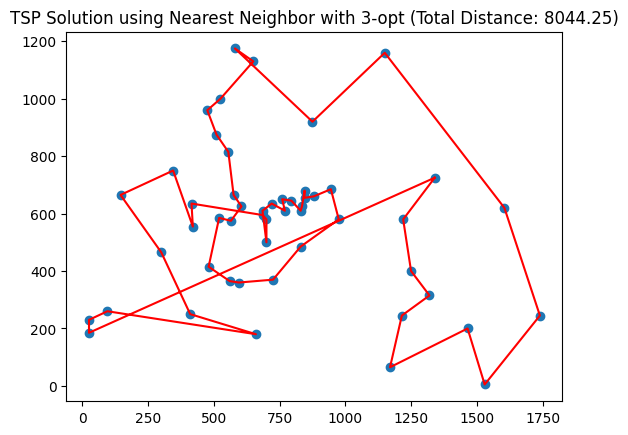

Time taken to render: 1.8720519542694092 seconds


Iteration 10047: Improved total distance to 8735.64
Iteration 16342: Improved total distance to 8719.27
Iteration 17425: Improved total distance to 8711.84
Iteration 19547: Improved total distance to 8572.44
Iteration 34817: Improved total distance to 8560.80
Iteration 57011: Improved total distance to 8546.88
Iteration 58899: Improved total distance to 8461.81
Iteration 75626: Improved total distance to 8324.78


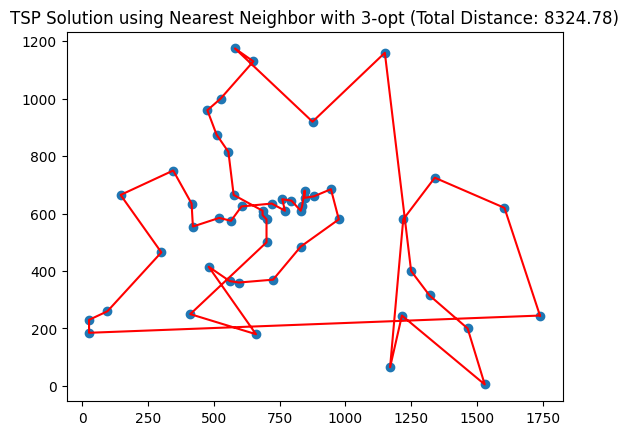

Time taken to render: 4.505296945571899 seconds


Average Tour Length: 8005.144113259638
Average Time taken to render: 3.0557088057200112 seconds


In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')  # Updated regular expression

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "berlin52.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(3):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")
